In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [323]:
df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [324]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [325]:
df["rooms_per_bedroom"] = df["total_rooms"] / df["total_bedrooms"] * 100 #Ratio of total rooms to bedrooms. Higher values indicate houses with fewer bedrooms relative to total rooms.
df["bedrooms_per_person"] = df['total_bedrooms'] / (df["population"] / df["households"]) # Number of bedrooms per person in a households
df["median_income_per_person"] = df["median_income"] / (df["population"] / df["households"]) # Median household income divided by average household size. Represents income per person.
df["rooms_per_person"] = df["total_rooms"] / (df["population"] / df["households"]) # Number of rooms per person in households


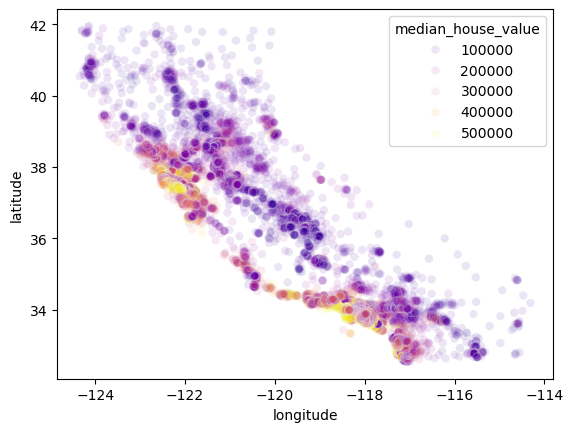

In [326]:
sns.scatterplot(x="longitude" , y="latitude" , data=df , hue="median_house_value" , palette="plasma" , alpha=0.1)
plt.show()


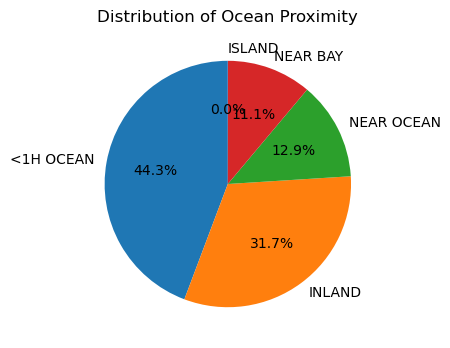

In [378]:
counts = df["ocean_proximity"].value_counts()
plt.figure(figsize=(4,4))
plt.pie(counts, labels=counts.index, autopct="%.1f%%", startangle=90)
plt.title("Distribution of Ocean Proximity")
plt.show()

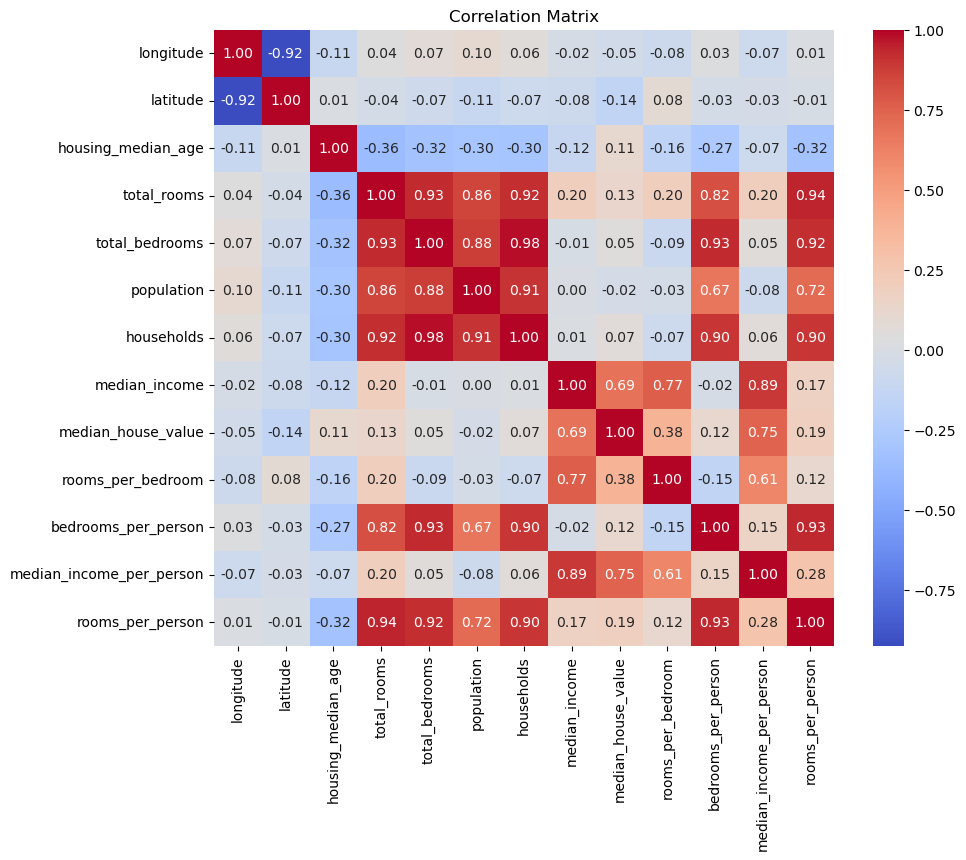

In [327]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [328]:
df.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_bedroom,bedrooms_per_person,median_income_per_person,rooms_per_person
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.079510,0.029785,-0.068664,0.013033
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.084902,-0.034768,-0.029887,-0.010647
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.160853,-0.266662,-0.071570,-0.321107
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.197684,0.818508,0.201818,0.942113
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.090517,0.930892,0.053979,0.924811
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.032065,0.671914,-0.075455,0.715858
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.067736,0.899222,0.062572,0.899335
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.766578,-0.019456,0.892193,0.166390
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.383920,0.119726,0.745628,0.191651
rooms_per_bedroom,-0.079510,0.084902,-0.160853,0.197684,-0.090517,-0.032065,-0.067736,0.766578,0.383920,1.000000,-0.145028,0.608079,0.117868


In [329]:
new_df = df.drop(columns=['total_bedrooms','population','total_rooms']) # Drop features that have low correlation with median_house_value


In [330]:
new_df.describe()

,longitude,latitude,housing_median_age,households,median_income,median_house_value,rooms_per_bedroom,bedrooms_per_person,median_income_per_person,rooms_per_person
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20433.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,499.539680,3.870671,206855.816909,498.482889,201.924648,1.408324,975.099534
std,2.003532,2.135952,12.585558,382.329753,1.899822,115395.615874,117.167609,182.195778,0.755017,854.573793
min,-124.350000,32.540000,1.000000,1.000000,0.499900,14999.000000,100.000000,0.004021,0.008225,0.015282
25%,-121.800000,33.930000,18.000000,280.000000,2.563400,119600.000000,416.978193,97.736704,0.869633,480.732919
50%,-118.490000,34.260000,29.000000,409.000000,3.534800,179700.000000,492.216981,152.824811,1.295461,764.475347
75%,-118.010000,37.710000,37.000000,605.000000,4.743250,264725.000000,570.036430,243.519577,1.775809,1188.228114
max,-114.310000,41.950000,52.000000,6082.000000,15.000100,500001.000000,1000.000000,3595.164850,7.549836,12920.978841


In [331]:
from sklearn.model_selection import train_test_split

In [332]:
X = new_df.drop(columns="median_house_value")
y = new_df["median_house_value"]

In [333]:
X_train ,X_test, y_train , y_test =  train_test_split(X, y ,random_state=42 ,test_size=0.2 )

In [334]:
from sklearn.impute import SimpleImputer

In [335]:
simple_impute = SimpleImputer(strategy="median")

In [336]:
cols_to_impute = ['rooms_per_bedroom' , 'bedrooms_per_person']
X_train[cols_to_impute] = simple_impute.fit_transform(X_train[cols_to_impute]) # Fill missing values (NaN) using the median strategy
X_test[cols_to_impute] = simple_impute.transform(X_test[cols_to_impute])# Fill missing values (NaN) using the median strategy

In [337]:
X_train["ocean_proximity"] = X_train["ocean_proximity"].apply(
    lambda x : "OTHER" if x == "ISLAND" else x
)
X_test["ocean_proximity"] = X_test["ocean_proximity"].apply(
    lambda x : "OTHER" if x == "ISLAND" else x
)
# Rename 'ISLAND' to 'OTHER' because there are only 5 'ISLAND' entries in the dataset.
# In the future, any category with very few entries can also be grouped under 'OTHER'.


In [338]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [339]:
from sklearn.metrics import r2_score , mean_absolute_error

In [340]:
X_test

,longitude,latitude,housing_median_age,households,median_income,ocean_proximity,rooms_per_bedroom,bedrooms_per_person,median_income_per_person,rooms_per_person
20046,-119.01,36.06,25.0,359.0,1.6812,INLAND,493.078043,153.437840,0.433585,388.142960
3024,-119.46,35.14,30.0,584.0,2.5313,INLAND,493.078043,153.437840,0.944587,1098.218530
15663,-122.44,37.80,52.0,963.0,3.4801,NEAR BAY,493.078043,153.437840,2.558272,2815.488550
20484,-118.72,34.28,17.0,495.0,5.7376,<1H OCEAN,493.078043,153.437840,1.665755,885.774194
9814,-121.93,36.62,34.0,428.0,3.7250,NEAR OCEAN,493.078043,153.437840,1.499812,946.592662
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,452.0,4.6050,<1H OCEAN,656.639004,161.261288,1.540681,1058.904515
16623,-120.83,35.36,28.0,705.0,2.7266,NEAR OCEAN,487.923251,378.563636,1.165002,1847.100000
18086,-122.05,37.31,25.0,568.0,9.2298,<1H OCEAN,764.126394,192.797476,3.307588,1473.216404
2144,-119.76,36.77,36.0,474.0,2.7850,INLAND,537.982833,180.019560,1.075868,968.474328


In [341]:
categorical_features = ['ocean_proximity']
numeric_features = ['longitude' , 'latitude' ,'housing_median_age','households', 'median_income','rooms_per_bedroom' ,'bedrooms_per_person','median_income_per_person' ,'rooms_per_person' ]

In [342]:
preprocessor = ColumnTransformer(transformers=[
    ("num" ,StandardScaler(),numeric_features ),
    ("cat" ,OneHotEncoder(),categorical_features ),
])
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

X_train = pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out(), index=X_train.index)
X_test = pd.DataFrame(X_test_transformed, columns=preprocessor.get_feature_names_out(), index=X_test.index)

In [343]:
X_train.columns = X_train.columns.str.replace("num__", "", regex=True)
X_train.columns = X_train.columns.str.replace("cat__", "", regex=True)
X_test.columns = X_train.columns.str.replace("cat__", "", regex=True)
X_test.columns = X_train.columns.str.replace("num__", "", regex=True)


In [344]:
X_train

,longitude,latitude,housing_median_age,households,median_income,rooms_per_bedroom,bedrooms_per_person,median_income_per_person,rooms_per_person,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,ocean_proximity_OTHER
14196,1.272587,-1.372811,0.348490,0.322906,-0.326196,-0.003155,-0.179845,-0.699040,-0.154523,0.0,0.0,0.0,1.0,0.0
8267,0.709162,-0.876696,1.618118,0.672027,-0.035843,-0.590312,1.396976,1.029793,1.144697,0.0,0.0,0.0,1.0,0.0
17445,-0.447603,-0.460146,-1.952710,-0.430461,0.144701,0.632760,-0.448934,0.149597,-0.331998,0.0,0.0,0.0,1.0,0.0
14265,1.232698,-1.382172,0.586545,-0.380587,-1.017864,-0.953192,-0.614262,-1.222236,-0.734923,0.0,0.0,0.0,1.0,0.0
2271,-0.108551,0.532084,1.142008,-0.314962,-0.171488,0.458369,-0.082012,0.174735,0.068794,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.808883,-0.872016,0.507194,-0.742833,1.307215,1.388379,-0.756878,0.907444,-0.636966,1.0,0.0,0.0,0.0,0.0
11964,1.073144,-0.759688,0.348490,-0.133839,-0.436266,0.359284,-0.312695,-0.833228,-0.221697,0.0,1.0,0.0,0.0,0.0
5390,0.599469,-0.755007,0.586545,0.070909,-0.496973,-1.106305,-0.174665,-0.702037,-0.410093,1.0,0.0,0.0,0.0,0.0
860,-1.185540,0.906510,-1.079841,0.154908,0.965450,0.852125,-0.079727,0.509553,0.173947,1.0,0.0,0.0,0.0,0.0


In [345]:
from sklearn.ensemble import RandomForestRegressor

In [346]:
rfr = RandomForestRegressor(n_estimators=350 ,max_depth=25)

In [347]:
rfr.fit(X_train , y_train)

RandomForestRegressor(max_depth=25, n_estimators=350)

In [348]:
rfr_pred = rfr.predict(X_test)

In [369]:
print("R2 Score is :" , r2_score(y_test , rfr_pred))
print("MAR is :" , mean_absolute_error(y_test , rfr_pred))

R2 Score is : 0.8217791535413522
MAR is : 30755.82611274767


In [349]:
from xgboost import XGBRegressor

In [350]:
X_train.columns =X_train.columns.str.replace("<" , "lt_" , regex=True)
X_test.columns =X_test.columns.str.replace("<" , "lt_" , regex=True)

In [351]:
xgb_model =XGBRegressor(
    max_depth = 7,
    gamma  = 1,
    n_estimators = 2256,
    learning_rate = 0.03,
    subsample=0.88,
    colsample_bytree = 0.85,
    min_child_weight=1,
    alpha = 6,
    max_leaves  = 75,
    max_bin = 2048,
    random_state = 42
)

In [352]:
xgb_model.fit(X_train , y_train)

XGBRegressor(alpha=6, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.85, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=2048, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=75, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=2256,
             n_jobs=None, ...)

In [353]:
xgb_pred = xgb_model.predict(X_test)

In [370]:
print("R2 Score is :" , r2_score(y_test , xgb_pred))
print("MAR is :" , mean_absolute_error(y_test , xgb_pred))

R2 Score is : 0.8572173589832259
MAR is : 27812.166280583817


In [379]:
[y_test.min(), y_test.max()]

[14999.0, 500001.0]

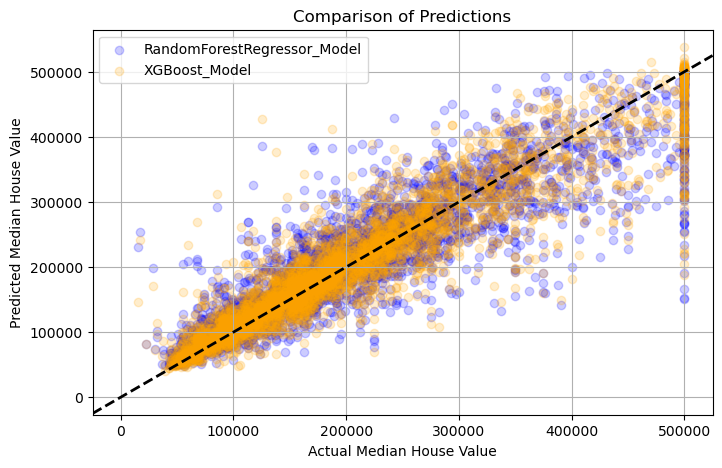

In [387]:
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(y_test, rfr_pred, color="blue", alpha=0.2, label="RandomForestRegressor_Model")
ax.scatter(y_test, xgb_pred, color="orange", alpha=0.2, label="XGBoost_Model")
ax.axline((0,0), slope=1, color='black', linestyle='--', lw=2)
ax.set_xlabel("Actual Median House Value")
ax.set_ylabel("Predicted Median House Value")
ax.set_title("Comparison of Predictions")
ax.legend()
ax.grid(True)
plt.show()


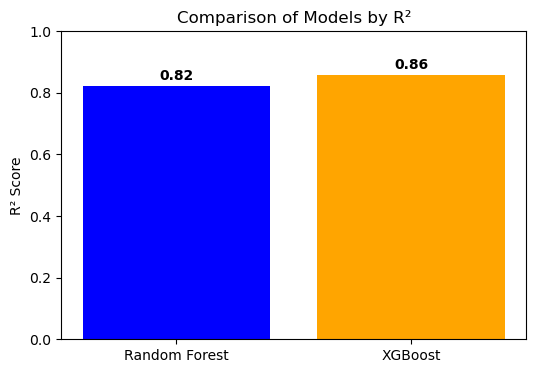

In [391]:
r2_rfr = r2_score(y_test, rfr_pred)
r2_xgb = r2_score(y_test, xgb_pred)

models = ['Random Forest', 'XGBoost']
r2_scores = [r2_rfr, r2_xgb]

plt.figure(figsize=(6,4))
plt.bar(models, r2_scores, color=['blue', 'orange'])
plt.ylim(0,1)
plt.ylabel("R² Score")
plt.title("Comparison of Models by R²")
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


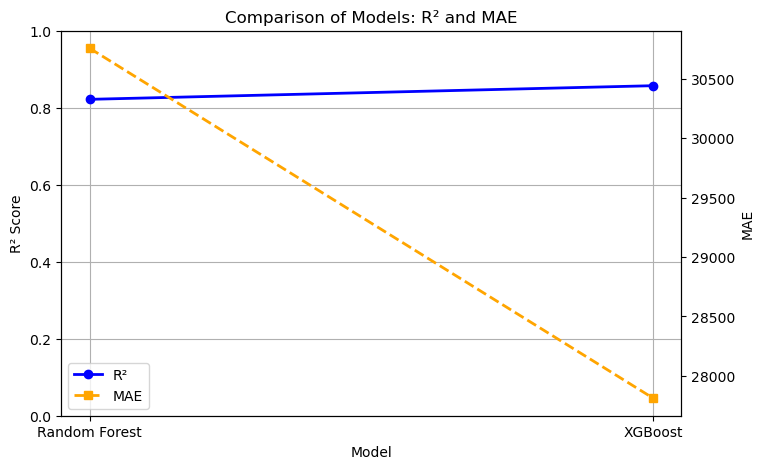

In [409]:
mae_rfr = mean_absolute_error(y_test, rfr_pred)
mae_xgb = mean_absolute_error(y_test, xgb_pred)
fig, ax1 = plt.subplots(figsize=(8,5))

ax1.plot(['Random Forest', 'XGBoost'], [r2_rfr, r2_xgb], marker='o', linestyle='-', color='blue', label='R²', linewidth=2)
ax1.set_ylim(0,1)
ax1.set_ylabel("R² Score")
ax1.set_xlabel("Model")
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(['Random Forest', 'XGBoost'], [mae_rfr, mae_xgb], marker='s', linestyle='--', color='orange', label='MAE', linewidth=2)
ax2.set_ylabel("MAE")

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='lower left')

plt.title("Comparison of Models: R² and MAE")
plt.show()